In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## A markdown cell with a ** means that question still needs work

In [2]:
#Read in the percapita csv file and name the variable
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## Q5

Q5- How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7662, 4)

Answer: There are 7,662 rows and 4 columns in the gdp per capita dataset.

## Q6

Q6- Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
#Drop the columns titled "Value Footnotes"
gdp_df = gdp_df.drop("Value Footnotes", axis = 'columns')

In [7]:
#Rename the remaining columns
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})

## Q7

Q7- How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
#Counting the number of years per country
counted_years = gdp_df.groupby("Country")["Year"].count()

Answer 7B: The following are the 40 countries missing years of data. 

In [9]:
#Showing the 40 countries with years of missing data
counted_years.sort_values().head(40)

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
CuraÃ§ao                     22
Palau                        22
SÃ£o TomÃ© and Principe      22
Qatar                        23
Other small states           23
Timor-Leste                  23
Liberia                      23
Libya                        24
San Marino                   25
Small states                 26
Montenegro                   26
Maldives                     28
Moldova                      28
Israel                       28
Iceland                      28
Estonia                      28
Croatia                      28
Serbia                       28
Slovenia                     28
Lithuania                    28
Latvia                       28
West Bank and Gaza           29
Bosnia and Herzegovina       29


Answer 7A: There are 202 countries with all 33 years of data.

In [10]:
#Showing the 202 countries with all 33 years of data
counted_years.sort_values().tail(202)

Country
Papua New Guinea               33
Pakistan                       33
Australia                      33
Pacific island small states    33
Austria                        33
                               ..
Jamaica                        33
Japan                          33
Jordan                         33
IDA total                      33
Zimbabwe                       33
Name: Year, Length: 202, dtype: int64

Answer 7C: Looking at this data of counted years, I notice Djibouti and Somalia only have 10 years of data, the 202 countries will full data have 33 years. The countries with less than 33 years seem to be smaller countries.

## Q8

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [11]:
#Getting 2020 
year_2020 = gdp_df[gdp_df["Year"] == 2020]

In [12]:
year_2020.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


C:\Users\adaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

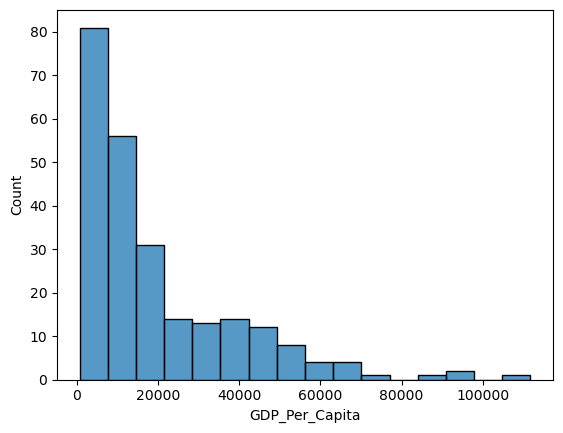

In [13]:
#Histogram
sns.histplot(data=year_2020, x="GDP_Per_Capita")

C:\Users\adaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

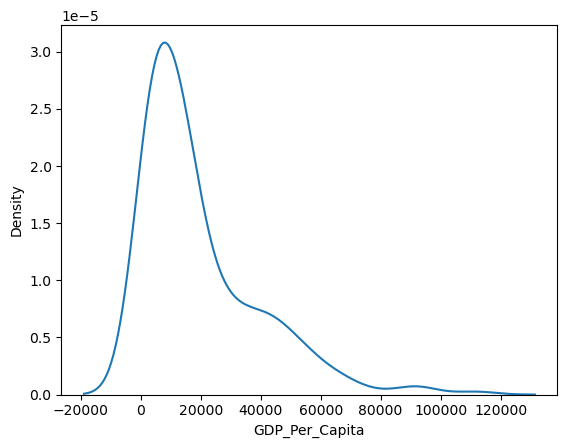

In [14]:
#Density plot
sns.kdeplot(year_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

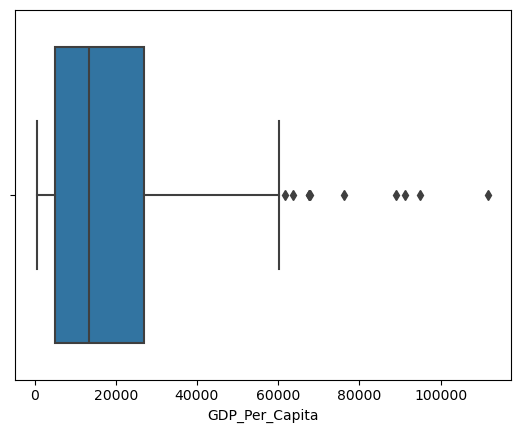

In [15]:
#Boxplot
sns.boxplot(x=year_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

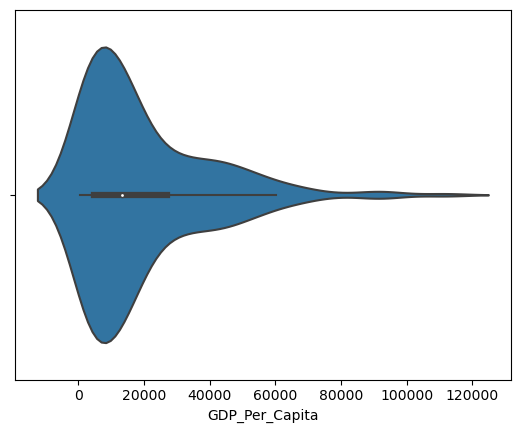

In [16]:
#Violin plot
sns.violinplot(x=year_2020["GDP_Per_Capita"])

## Q9

9. What was the median GDP per capita value in 2020?


In [17]:
year_2020["GDP_Per_Capita"].median()

13357.997573370474

Answer 9 (rounded): 13,358

## Q10

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of lot.


In [18]:
#Narrowing down the info to the years 1990, 2000, 2010, 2020 and saving it to gdp_decades
gdp_decades = gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2010) | (gdp_df["Year"] == 2020)]

In [19]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

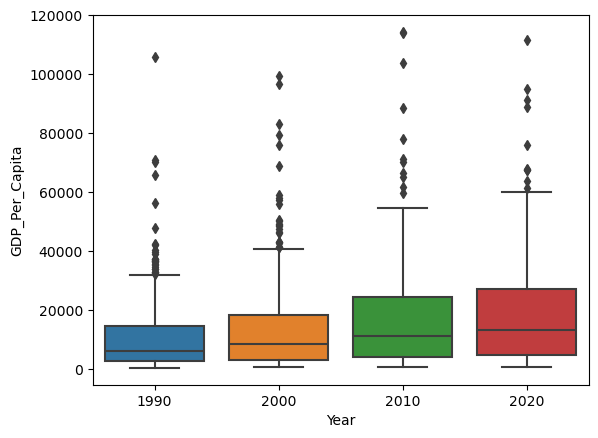

In [20]:
#Boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

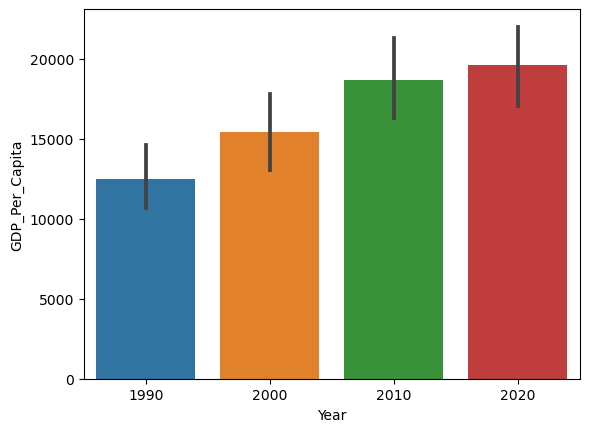

In [21]:
#Barplot
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita",
    data=gdp_decades, 
    )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

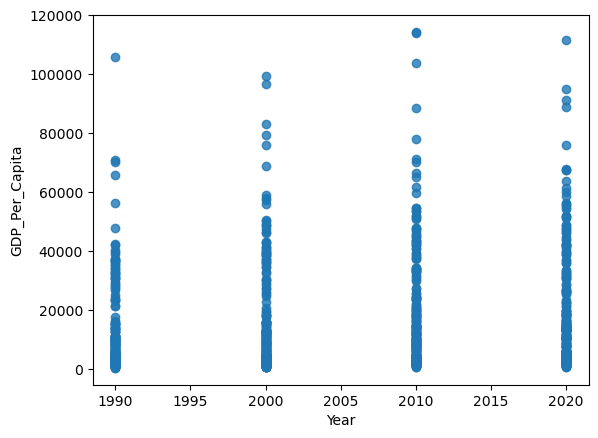

In [22]:
#Scatterplot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)

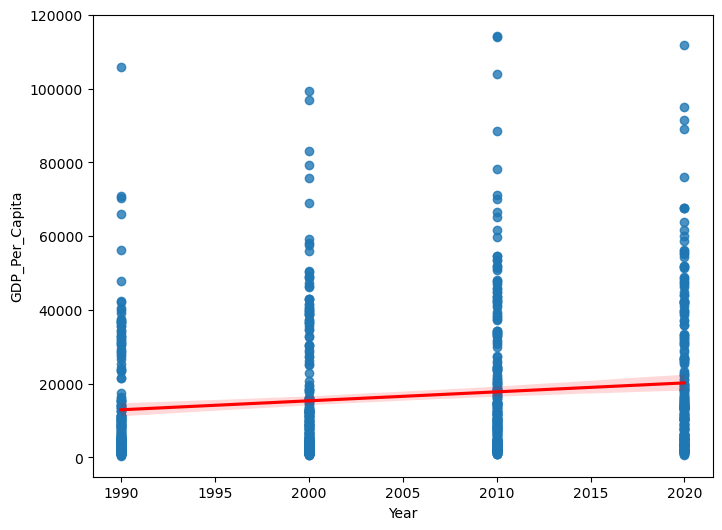

In [23]:
#Scatterplot with trend line
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

## Q11

11. Which country was the first to have a GDP per capita greater than $100,000?


In [24]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [25]:
gdp_df.groupby(["Year", "Country"])["GDP_Per_Capita"].max().head(200)

Year  Country                    
1990  Africa Eastern and Southern      3037.297466
      Africa Western and Central       2788.301039
      Albania                          4827.027705
      Algeria                          8828.874473
      Angola                           5793.084512
                                         ...      
      Ukraine                         16428.480469
      United Arab Emirates           105893.626059
      United Kingdom                  31308.140875
      United States                   40451.498405
      Upper middle income              5830.193002
Name: GDP_Per_Capita, Length: 200, dtype: float64

Answer: United Arab Emirates was the first to have a GDP per capita greater than $100k.

## Q12

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [26]:
year_2020[year_2020["GDP_Per_Capita"]==year_2020["GDP_Per_Capita"].max()]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


Answer: Luxembourg had the highest GDP per capita in 2020.

In [27]:
#Getting year and GDP per capita data for Luxembourg
lxmbrg = gdp_df[gdp_df["Country"]=="Luxembourg"]

In [28]:
lxmbrg

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


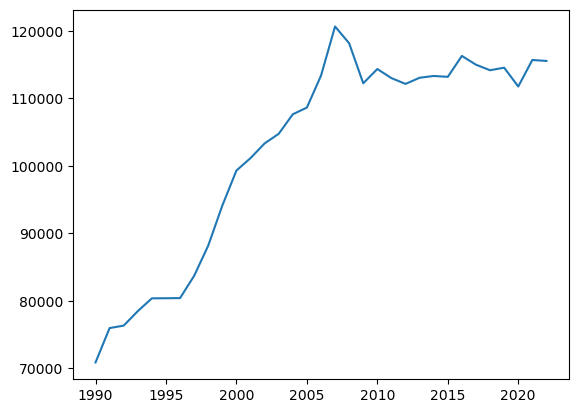

In [29]:
#Creating a plot showing Luxembourg's per capita over the dataset's timespan
plt.plot("Year", "GDP_Per_Capita", data=lxmbrg)

## Q13

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 


In [30]:
year_2020[year_2020["GDP_Per_Capita"]==year_2020["GDP_Per_Capita"].min()]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


Answer: Burundi had the lowest GDP per capita in 2020.

In [31]:
#Getting year and GDP per capita data for Burundi
brnd = gdp_df[gdp_df["Country"]=="Burundi"]

In [32]:
brnd

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


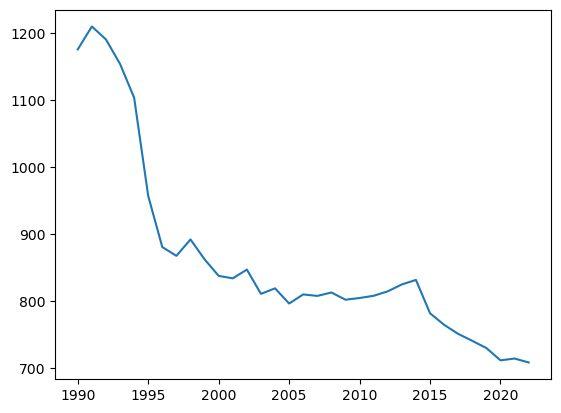

In [33]:
#Creating a plot showing Burundi's per capita over the dataset's timespan
plt.plot("Year", "GDP_Per_Capita", data=brnd)

## 13 Bonus

**Bonus question:** Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [34]:
#Calculating the average GDP per capita for 2020
year_2020["GDP_Per_Capita"].mean()

19586.75444556196

In [35]:
#Subsetting data for 1990
year_1990 = gdp_df[gdp_df["Year"] == 1990]

In [36]:
year_1990.head()

,Country,Year,GDP_Per_Capita
52,Africa Eastern and Southern,1990,3037.297466
85,Africa Western and Central,1990,2788.301039
118,Albania,1990,4827.027705
151,Algeria,1990,8828.874473
184,Angola,1990,5793.084512


In [37]:
#Calculating the average GDP per capita for 1990
year_1990["GDP_Per_Capita"].mean()

12506.08837386169

Answer: It is true, countries in general had a higher GDP per capita in 2020 than in 1990.

In [38]:
#Subsetting GDP per capita for years 1990 and 2020
years_9020 = gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2020)]

In [39]:
years_9020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
85,Africa Western and Central,1990,2788.301039
...,...,...,...
7595,World,1990,9705.981267
7598,Zambia,2020,3183.650773
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419


In [40]:
#Dropping Countries that only appear once so we can compare only countries with GDP per capita values in both 1990 & 2020
years_9020[years_9020.groupby("Country").Country.transform(len)>1]

,Country,Year,GDP_Per_Capita
22,Africa Eastern and Southern,2020,3455.023119
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
85,Africa Western and Central,1990,2788.301039
88,Albania,2020,13278.369769
...,...,...,...
7595,World,1990,9705.981267
7598,Zambia,2020,3183.650773
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419


In [110]:
years_9020_pivot = years_9020.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")

In [111]:
years_9020_pivot

Year,1990,2020
Country,,
Afghanistan,NaN,1968.34
Africa Eastern and Southern,3037.30,3455.02
Africa Western and Central,2788.30,3957.93
Albania,4827.03,13278.37
Algeria,8828.87,10844.77
...,...,...
Viet Nam,2099.39,10450.62
West Bank and Gaza,NaN,5402.54
World,9705.98,16204.17


In [114]:
#Showing the countries with a lower GDP per capita in 2020 than in 1990
years_9020_pivot[years_9020_pivot[1990] > years_9020_pivot[2020]]

Year,1990,2020
Country,,
Barbados,14097.40,13805.78
Brunei,70358.72,61603.55
Burundi,1175.16,711.36
Central African Republic,1200.61,847.77
Congo,5007.32,3384.65
Dem. Rep. Congo,1750.17,1044.07
Fragile and conflict affected situations,4864.81,4357.62
Gabon,17559.01,13903.29
Guinea-Bissau,1998.17,1803.63


In [41]:
#compare_yrs = pd.concat([year_1990, year_2020], keys=["Country", "Year"], axis=1)

In [42]:
#compare_yrs[compare_yrs.groupby("Country").Country.transform(len)>1]

## Q14

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [43]:
#Reading in the internet dataset after opening it in Excel and doing an auto-convert to fix Values containing an "E"
internet_df = pd.read_csv('../data/internet_use.csv')

In [44]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [45]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [46]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [47]:
#Changing the data type of the Value column to float
internet_df["Value"] = internet_df["Value"].astype(float)

In [48]:
#Changing the Value column to show two decimal places
pd.options.display.float_format = "{:.2f}".format

In [49]:
#Changing the Year column data type from float to integer
#internet_df["Year"] = internet_df["Year"].astype(int)

In [50]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.39,NaN
1,Afghanistan,2013,5.90,NaN
2,Afghanistan,2012,5.45,NaN
3,Afghanistan,2011,5.00,NaN
4,Afghanistan,2010,4.00,NaN


## Q15

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [51]:
internet_df = internet_df.drop("Value Footnotes", axis = "columns")

In [52]:
#Rennaming remaining columns:
internet_df = internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})

In [53]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.90
2,Afghanistan,2012,5.45
3,Afghanistan,2011,5.00
4,Afghanistan,2010,4.00


In [54]:
#Changing the Year column data type from float to integer
#internet_df["Year"] = internet_df["Year"].astype(int)

## Q16

16. Look at the number of observations in this dataset per year. What do you notice?


In [55]:
internet_df.shape

(4495, 3)

Answer: The first thing I notice is there are significantly less rows than the GDP_per_capita dataset. I also notice even with less rows, there are a significant amount of NaN values.

## **Q17

17. What is the first year to have a non-zero internet users percentage value?

In [56]:
greater_than_zero = internet_df[internet_df["Internet_Users_Pct"] > 0]

In [57]:
greater_than_zero.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.90
2,Afghanistan,2012,5.45
3,Afghanistan,2011,5.00
4,Afghanistan,2010,4.00


In [58]:
#Attempting to see the first year with a greater than zero internet percentage
greater_than_zero.sort_values("Year", ascending = False)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
2049,Jamaica,2014,40.50
4095,Trinidad and Tobago,2014,65.10
1999,Israel,2014,71.45
1974,Ireland,2014,79.69
...,...,...,...
204,Australia,1990,0.59
4301,United States,1990,0.78
728,Canada,1990,0.36
375,Belgium,1990,0.00


## Q18

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [59]:
internet_0014 = internet_df[(internet_df["Year"] == 2000) | (internet_df["Year"] == 2014)]

In [60]:
internet_0014.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
15,Albania,2014,60.10
29,Albania,2000,0.11
36,Algeria,2014,18.09
50,Algeria,2000,0.49


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

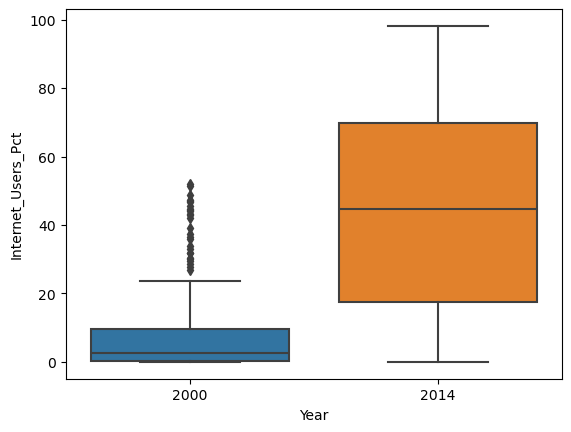

In [61]:
sns.boxplot( x=internet_0014["Year"], y=internet_0014["Internet_Users_Pct"] )

Answer: There is a huge increase in internet usage in 2014 compared to 2000.

## Q19

19. For how many countries was the percentage of internet users below 5% in 2014?


In [62]:
internet_df[(internet_df["Internet_Users_Pct"] < 5) & (internet_df["Year"] == 2014)]

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


Answer: 16 countries

## Q20

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [63]:
#Merging the gdp and internet users dataframes into one.
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [64]:
#An attempt to merge the two dataframes that resulted in issues with later questions due to multiple columns having the same names
#gdp_and_internet_use = pd.concat([gdp_df, internet_df], axis =1, join ="inner")

In [65]:
gdp_and_internet_use.head(20)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.02,NaN
1,Afghanistan,2020,1968.34,NaN
2,Afghanistan,2019,2079.92,NaN
3,Afghanistan,2018,2060.70,NaN
4,Afghanistan,2017,2096.09,NaN
5,Afghanistan,2016,2101.42,NaN
6,Afghanistan,2015,2108.71,NaN
7,Afghanistan,2014,2144.45,6.39
8,Afghanistan,2013,2165.34,5.90
9,Afghanistan,2012,2122.83,5.45


In [66]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8731,Yemen,1999,NaN,0.06
8732,Yemen,1998,NaN,0.02
8733,Yemen,1997,NaN,0.02
8734,Yemen,1996,NaN,0.00
8735,Yemen,1990,NaN,0.00


## Q21

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [67]:
#subsetting the year column to just 2014
internet_14 = internet_df[(internet_df["Year"] == 2014)]

In [68]:
internet_14.sort_values("Internet_Users_Pct", ascending = False)

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30
1083,Denmark,2014,95.99
59,Andorra,2014,95.90
...,...,...,...
3648,Somalia,2014,1.63
623,Burundi,2014,1.38
4019,Timor-Leste,2014,1.14
1256,Eritrea,2014,0.99


Answer: The 3 countries with the highest internet usage in 2014 are Iceland, Bermuda, and Norway.

In [69]:
#Showing the gdp over time for the highest internet usages countries from 2014
high_three = gdp_df.loc[(gdp_df["Country"] == "Iceland") | (gdp_df["Country"] == "Bermuda") | (gdp_df["Country"] == "Norway")]

In [70]:
high_three

,Country,Year,GDP_Per_Capita
679,Bermuda,2022,81165.65
680,Bermuda,2021,78570.49
681,Bermuda,2020,76117.80
682,Bermuda,2019,81681.73
683,Bermuda,2018,81423.41
...,...,...,...
5232,Norway,1994,47728.44
5233,Norway,1993,45691.16
5234,Norway,1992,44692.36
5235,Norway,1991,43399.76


In [71]:
#Attempting to graph the GDP per capita for Iceland, Bermuda, and Norway
#graph = seaborn.FacetGrid(high_three, col ="Year",  row ="GDP_Per_Capita") 
#graph.map(sns.histplot, "Country", edgecolor ="w").add_legend() 

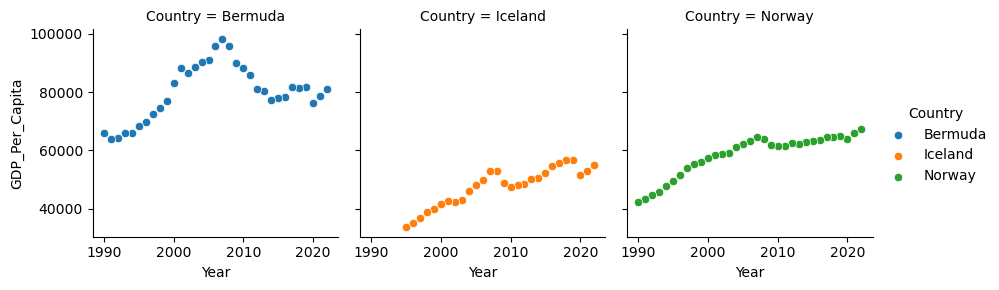

In [72]:
g = sns.FacetGrid(high_three, col="Country", hue="Country")
g.map_dataframe(sns.scatterplot, x="Year", y="GDP_Per_Capita")
g.add_legend()

## Q22

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [73]:
gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use["Year"] == 2014)]

In [74]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.45,6.39
28,Africa Eastern and Southern,2014,3642.88,NaN
61,Africa Western and Central,2014,4146.99,NaN
94,Albania,2014,11586.82,60.10
127,Algeria,2014,11561.26,18.09
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


## **Q23

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

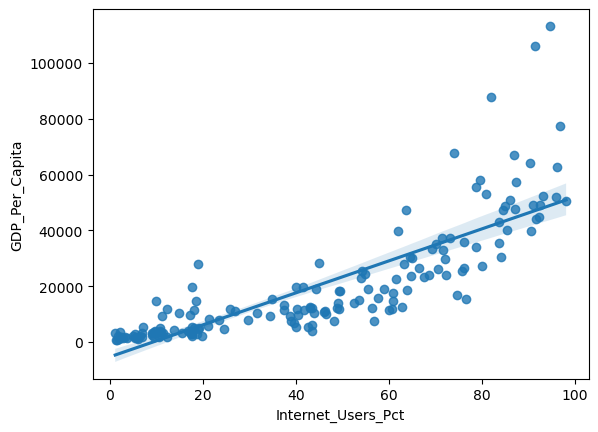

In [75]:
sns.regplot(x=gdp_and_internet_use_2014["Internet_Users_Pct"], y=gdp_and_internet_use_2014["GDP_Per_Capita"])

C:\Users\adaly\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\adaly\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

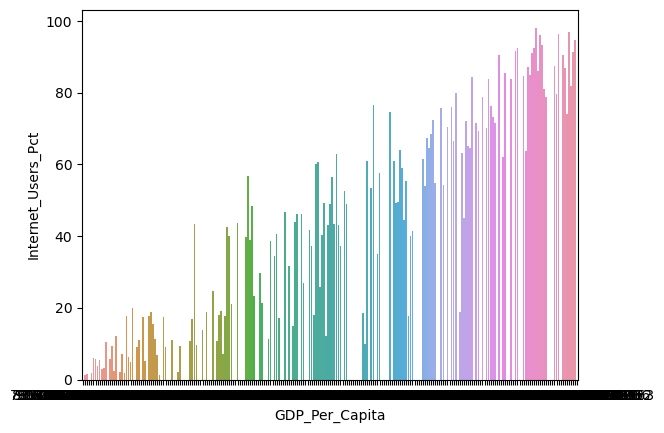

In [76]:
#Kept the barplot just because it looks pretty
#Barplot
sns.barplot(
    x="GDP_Per_Capita", 
    y="Internet_Users_Pct",
    data=gdp_and_internet_use_2014
    )

I notice in the above plot that the higher the GDP per capita in 2014, the higher the internet usage for each country. 
#I want to investigate that first taller yellowish-green colored bar but I don't know how.

## **Q24

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [77]:
#Subsetting the gdp dataframe to include only info from 2014
gdp_per_capita_2014 = gdp_df[gdp_df["Year"] == 2014]

In [78]:
gdp_per_capita_2014.head()

,Country,Year,GDP_Per_Capita
7,Afghanistan,2014,2144.45
28,Africa Eastern and Southern,2014,3642.88
61,Africa Western and Central,2014,4146.99
94,Albania,2014,11586.82
127,Algeria,2014,11561.26


In [79]:
#Using pd.qcut function to divide countries into 3 groups based on GDP per capita values
gdp_grouped = pd.qcut(gdp_per_capita_2014["GDP_Per_Capita"], 3, labels=["low", "medium", "high"])

In [80]:
gdp_grouped

7          low
28         low
61         low
94      medium
127     medium
         ...  
7509    medium
7542       low
7571    medium
7604       low
7637       low
Name: GDP_Per_Capita, Length: 242, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [115]:
#Attempting to add the newly created column to the dataframe
#gdp_per_capita_2014.insert(4, "GDP_group", ["gdp_grouped"]) 

## **Q25

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


## **Bonus (Still need to figure out a good graph for this)

Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.


In [82]:
infant_mortality_df = pd.read_csv('../data/infant_mortality.csv')

In [83]:
infant_mortality_df

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Total,2011,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,73,NaN
1,Afghanistan,Total,1990,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,129,NaN
2,Albania,Total,2011,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,13,NaN
3,Albania,Total,1990,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,36,NaN
4,Algeria,Total,2011,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,26,NaN
...,...,...,...,...,...,...,...
405,Yemen,Total,1990,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,89,NaN
406,Zambia,Total,2011,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,53,NaN
407,Zambia,Total,1990,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,114,NaN
408,Zimbabwe,Total,2011,UN_Inter-agency Group for Child Mortality Esti...,Deaths per 1000 live births,43,NaN


In [84]:
#Dropping columns I won't need for this project
infant_mortality_df = infant_mortality_df.drop(["Subgroup", "Source", "Unit", "Value Footnotes"], axis = 'columns')

In [85]:
#Renaming the columns
infant_mortality_df = infant_mortality_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Deaths_Per_Thousand_Live_Births'})

In [86]:
infant_mortality_df

,Country,Year,Deaths_Per_Thousand_Live_Births
0,Afghanistan,2011,73
1,Afghanistan,1990,129
2,Albania,2011,13
3,Albania,1990,36
4,Algeria,2011,26
...,...,...,...
405,Yemen,1990,89
406,Zambia,2011,53
407,Zambia,1990,114
408,Zimbabwe,2011,43


In [87]:
gdp_internet_use_infant_mortality = pd.merge(gdp_and_internet_use, infant_mortality_df, on=['Country', 'Year'], how='outer')

In [88]:
gdp_internet_use_infant_mortality

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Deaths_Per_Thousand_Live_Births
0,Afghanistan,2021,1517.02,NaN,NaN
1,Afghanistan,2020,1968.34,NaN,NaN
2,Afghanistan,2019,2079.92,NaN,NaN
3,Afghanistan,2018,2060.70,NaN,NaN
4,Afghanistan,2017,2096.09,NaN,NaN
...,...,...,...,...,...
8787,United Republic of Tanzania,1990,NaN,NaN,97.00
8788,Venezuela (Bolivarian Republic of),2011,NaN,NaN,13.00
8789,Venezuela (Bolivarian Republic of),1990,NaN,NaN,26.00
8790,Western and Central Africa,2011,NaN,NaN,83.00


In [89]:
gdp_internet_deaths_2014 = gdp_internet_use_infant_mortality[gdp_internet_use_infant_mortality["Year"] == 2014]

In [90]:
gdp_internet_deaths_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Deaths_Per_Thousand_Live_Births
7,Afghanistan,2014,2144.45,6.39,NaN
28,Africa Eastern and Southern,2014,3642.88,NaN,NaN
61,Africa Western and Central,2014,4146.99,NaN,NaN
94,Albania,2014,11586.82,60.10,NaN
127,Algeria,2014,11561.26,18.09,NaN
...,...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06,NaN
8647,Turkey,2014,NaN,51.04,NaN
8670,Venezuela,2014,NaN,57.00,NaN
8694,Virgin Islands (U.S.),2014,NaN,50.07,NaN


## The following are several failed attempts to graph this new dataframe to show the relationship between internet use, infant mortality rates, and GDP per capita

g = sns.FacetGrid(gdp_internet_deaths_2014, col="Country", hue="GDP_Per_Capita")
g.map_dataframe(sns.scatterplot, x="Internet_Users_Pct", y="Deaths_Per_Thousand_Live_Births")
g.add_legend()

sns.barplot(
    x="GDP_Per_Capita", 
    y=("Internet_Users_Pct", "Deaths_Per_Thousand_Live_Births"),
    data=gdp_internet_deaths_2014
    )

# Set the width of the bars
barWidth = 0.5

# Set the position of the bars on the x-axis
r1 = np.arange(len(gdp_internet_deaths_2014['Internet_Users_Pct']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create the bar plots
plt.bar(r1, gdp_internet_deaths_2014['Internet_Users_Pct'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Internet Users')
plt.bar(r2, gdp_internet_deaths_2014['GDP_Per_Capita'], color='#557f2d', width=barWidth, edgecolor='white', label='GDP Per Capita')
plt.bar(r3, gdp_internet_deaths_2014['Deaths_Per_Thousand_Live_Births'], color='#2d7f5e', width=barWidth, edgecolor='white', label='Infant Deaths Per Thousand Live Births')

# Add a title
plt.xlabel('')
plt.title('Internet Use, GDP Per Capita, & Infant Mortality Rates in 2014')

# Add legend
plt.legend()